In [1]:
import pandas as pd
import numpy as np
from sklearn.neighbors import NearestNeighbors
from scipy.sparse import csr_matrix
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
import requests
import random
from PIL import Image
from io import BytesIO
import ipywidgets as widgets

In [2]:
#Load data for the system
book_info = pd.read_csv('Books.csv', low_memory=False)
user_info = pd.read_csv('Users.csv')
rating_info = pd.read_csv('Ratings.csv')
rating_info

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10
1149778,276721,0590442449,10


In [3]:
#combine the users and ratings csv file
ratings = rating_info.merge(user_info, on='User-ID')
ratings

,User-ID,ISBN,Book-Rating,Location,Age
0,276725,034545104X,0,"tyler, texas, usa",NaN
1,276726,0155061224,5,"seattle, washington, usa",NaN
2,276727,0446520802,0,"h, new south wales, australia",16.0
3,276729,052165615X,3,"rijeka, n/a, croatia",16.0
4,276729,0521795028,6,"rijeka, n/a, croatia",16.0
...,...,...,...,...,...
1149775,276704,1563526298,9,"cedar park, texas, usa",NaN
1149776,276706,0679447156,0,"quebec, quebec, canada",18.0
1149777,276709,0515107662,10,"mannington, west virginia, usa",38.0
1149778,276721,0590442449,10,"providence, rhode island, usa",14.0


In [4]:
#combines all three into one useable file
books = ratings.merge(book_info, on='ISBN')
books

,User-ID,ISBN,Book-Rating,Location,Age,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,"tyler, texas, usa",NaN,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,2313,034545104X,5,"cincinnati, ohio, usa",23.0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
2,6543,034545104X,0,"strafford, missouri, usa",34.0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
3,8680,034545104X,5,"st. charles county, missouri, usa",2.0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
4,10314,034545104X,9,"beaverton, oregon, usa",NaN,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
...,...,...,...,...,...,...,...,...,...,...,...,...
1031131,276688,0517145553,0,"fort lee, new jersey, usa",NaN,Mostly Harmless,Douglas Adams,1995,Random House Value Pub,http://images.amazon.com/images/P/0517145553.0...,http://images.amazon.com/images/P/0517145553.0...,http://images.amazon.com/images/P/0517145553.0...
1031132,276688,1575660792,7,"fort lee, new jersey, usa",NaN,Gray Matter,Shirley Kennett,1996,Kensington Publishing Corporation,http://images.amazon.com/images/P/1575660792.0...,http://images.amazon.com/images/P/1575660792.0...,http://images.amazon.com/images/P/1575660792.0...
1031133,276690,0590907301,0,"wakeman, ohio, usa",43.0,Triplet Trouble and the Class Trip (Triplet Tr...,Debbie Dadey,1997,Apple,http://images.amazon.com/images/P/0590907301.0...,http://images.amazon.com/images/P/0590907301.0...,http://images.amazon.com/images/P/0590907301.0...
1031134,276704,0679752714,0,"cedar park, texas, usa",NaN,A Desert of Pure Feeling (Vintage Contemporaries),Judith Freeman,1997,Vintage Books USA,http://images.amazon.com/images/P/0679752714.0...,http://images.amazon.com/images/P/0679752714.0...,http://images.amazon.com/images/P/0679752714.0...


In [5]:
#Cleans data for ease of uses to me
books = books.drop(labels=['Publisher', 'Image-URL-S', 'Image-URL-L', 'Age', 'Location'], axis = 1)
books

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Image-URL-M
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,http://images.amazon.com/images/P/034545104X.0...
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,http://images.amazon.com/images/P/034545104X.0...
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,http://images.amazon.com/images/P/034545104X.0...
3,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,http://images.amazon.com/images/P/034545104X.0...
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,http://images.amazon.com/images/P/034545104X.0...
...,...,...,...,...,...,...,...
1031131,276688,0517145553,0,Mostly Harmless,Douglas Adams,1995,http://images.amazon.com/images/P/0517145553.0...
1031132,276688,1575660792,7,Gray Matter,Shirley Kennett,1996,http://images.amazon.com/images/P/1575660792.0...
1031133,276690,0590907301,0,Triplet Trouble and the Class Trip (Triplet Tr...,Debbie Dadey,1997,http://images.amazon.com/images/P/0590907301.0...
1031134,276704,0679752714,0,A Desert of Pure Feeling (Vintage Contemporaries),Judith Freeman,1997,http://images.amazon.com/images/P/0679752714.0...


In [6]:
#cleans data only looking at users that have rated 100 books as well as books that are rated over 50 times
books = books[books['User-ID'].map(books['User-ID'].value_counts()) > 100]
books = books[books['Book-Title'].map(books['Book-Title'].value_counts()) > 50]
books = books.reset_index(drop=True)
books[["Book-Title"]] = books[["Book-Title"]].astype(str)
books

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Image-URL-M
0,278418,0446520802,0,The Notebook,Nicholas Sparks,1996,http://images.amazon.com/images/P/0446520802.0...
1,3363,0446520802,0,The Notebook,Nicholas Sparks,1996,http://images.amazon.com/images/P/0446520802.0...
2,7158,0446520802,10,The Notebook,Nicholas Sparks,1996,http://images.amazon.com/images/P/0446520802.0...
3,8253,0446520802,10,The Notebook,Nicholas Sparks,1996,http://images.amazon.com/images/P/0446520802.0...
4,11676,0446520802,10,The Notebook,Nicholas Sparks,1996,http://images.amazon.com/images/P/0446520802.0...
...,...,...,...,...,...,...,...
95785,271284,0440910927,0,The Rainmaker,John Grisham,1995,http://images.amazon.com/images/P/0440910927.0...
95786,271705,B0001PIOX4,0,Fahrenheit 451,Ray Bradbury,1993,http://images.amazon.com/images/P/B0001PIOX4.0...
95787,274004,037572799X,0,In Pursuit of the Proper Sinner,Elizabeth George,2000,http://images.amazon.com/images/P/037572799X.0...
95788,274808,0449701913,0,Homecoming,Cynthia Voigt,1983,http://images.amazon.com/images/P/0449701913.0...


Text(0.5, 1.0, 'Top 20 Highest Rated Books')

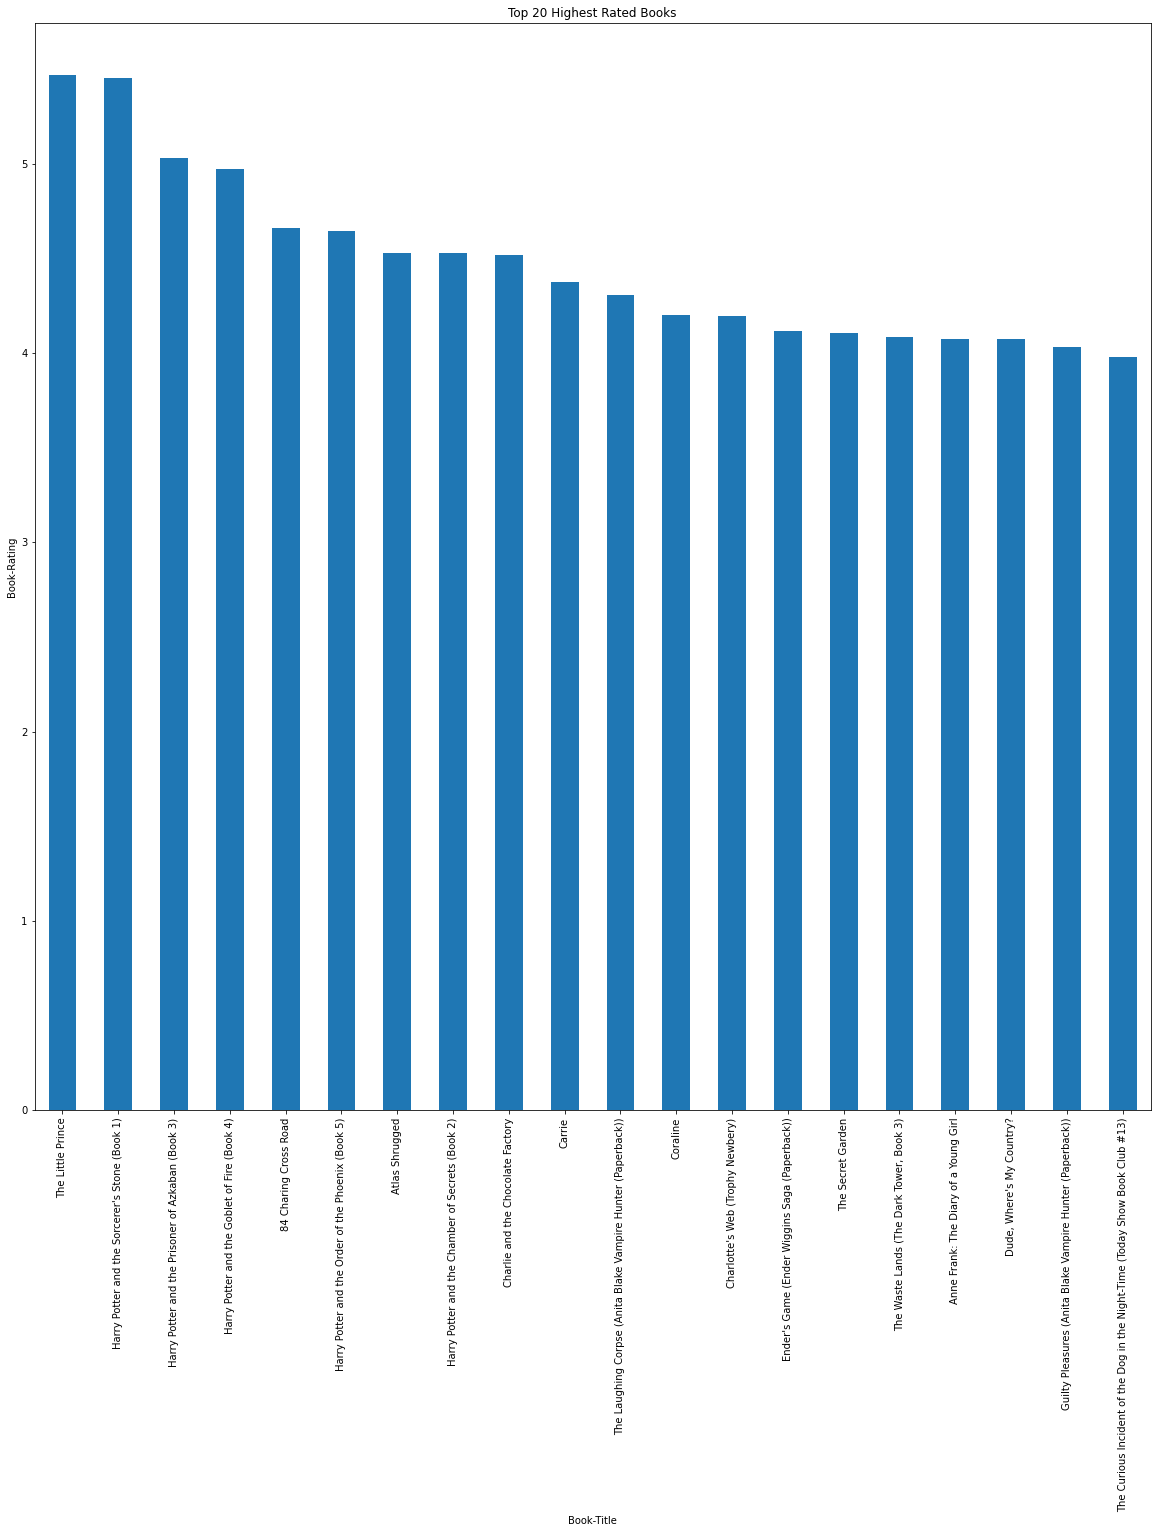

In [34]:
graph_of_ratings = books['Book-Rating'].groupby(books['Book-Title']).mean().sort_values(ascending=False).head(20)
plt.rcParams["figure.figsize"]=20,20
graph_of_ratings.plot.bar()
plt.xlabel("Book-Title")
plt.ylabel("Book-Rating")
plt.title('Top 20 Highest Rated Books')

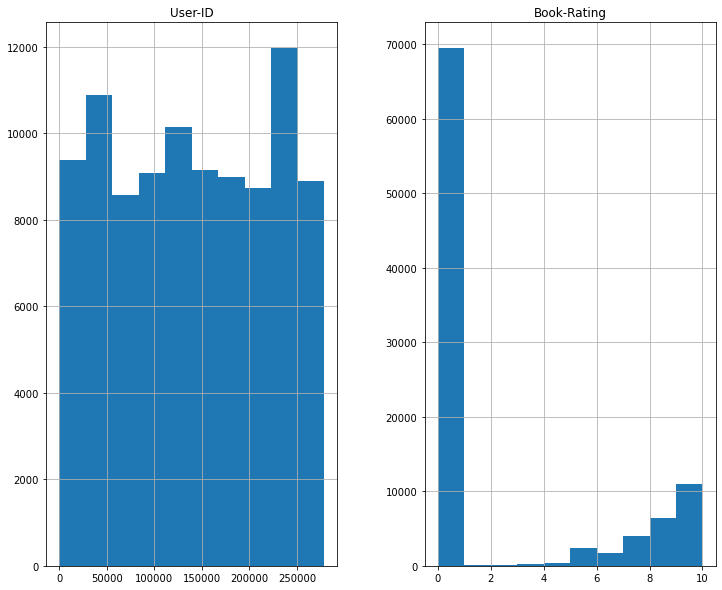

In [44]:
books.hist(figsize=(12,10))
plt.show()

Text(0.5, 1.0, 'Top 20 Highest Rated Books')

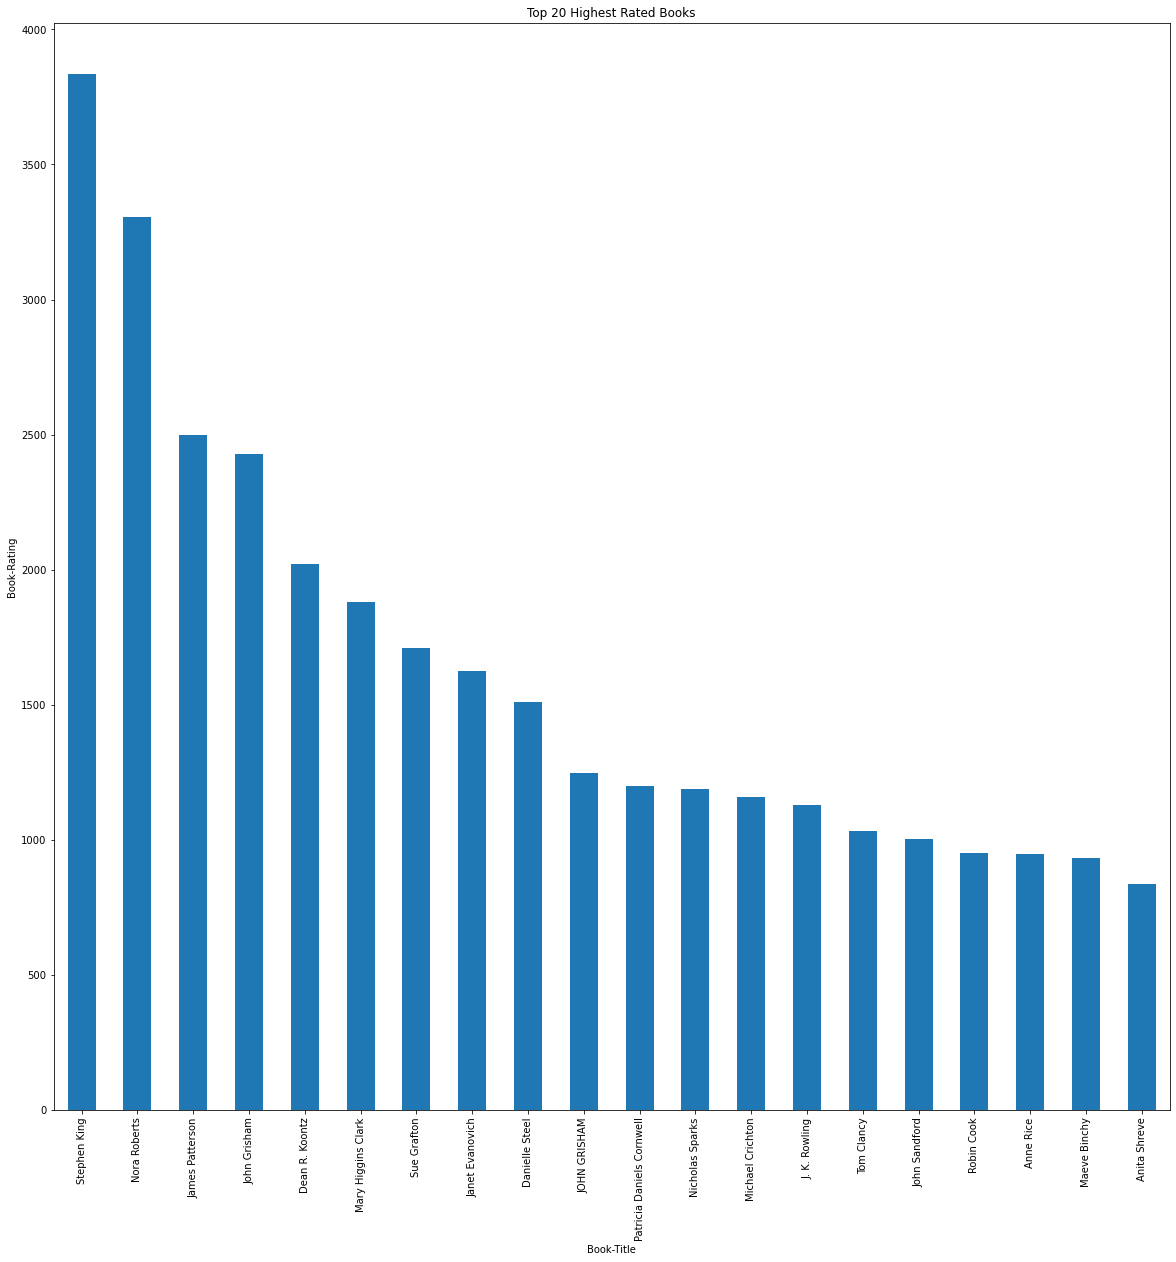

In [54]:
graph_of_ratings = books['Book-Rating'].groupby(books['Book-Author']).count().sort_values(ascending=False).head(20)
plt.rcParams["figure.figsize"]=20,20
graph_of_ratings.plot.bar()
plt.xlabel("Book-Title")
plt.ylabel("Book-Rating")
plt.title('Top 20 Highest Rated Books')

In [8]:
data_matrix = books.pivot_table(index='Book-Title',columns='User-ID',values='Book-Rating')
data_matrix.fillna(0,inplace=True)

In [9]:
book_names = books.groupby('Book-Title').count()['ISBN'].sort_values(ascending=False)
book_names = list(book_names.index)

book_dropdown = widgets.Dropdown(
    options=book_names,
    value=book_names[0],
    description='Book Title',
    disabled=False,)


In [10]:
nearest_books = cosine_similarity(data_matrix)

def recommend_books(books,book_name):
    
    if books['Book-Title'].str.contains(book_name).any()==False:
        return -1
        
    index = np.where(data_matrix.index==book_name)[0][0]

    similar_books = list(enumerate(nearest_books[index]))
    similar_books = sorted(similar_books,key = lambda x:x[1],reverse=True)[1:6]

    book_recommend = []
    for i in similar_books:
        temp_df = books[books['Book-Title'] == data_matrix.index[i[0]]]
        book_recommend.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Title'].values))       
    return book_recommend


book_dropdown

Dropdown(description='Book Title', options=('Wild Animus', 'The Lovely Bones: A Novel', "Bridget Jones's Diary…

Because you like "Birthright" 


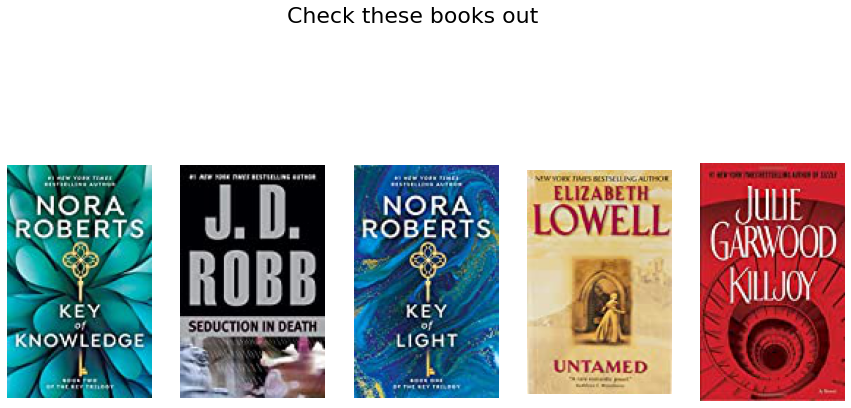

In [55]:

for i in range(1):
    title = book_dropdown.value
    book_recommend = recommend_books(books,title)
    if book_recommend == -1:
        print("No recommendation found")
        pass
    else:
        
        n = len(book_recommend)
        author = books[books['Book-Title']==title]['Book-Author'].values
        
        print('Because you like "{}" '.format(title))
        fig, axs = plt.subplots(1, n,figsize=(15,8))
        fig.suptitle('Check these books out', size = 22)

        for i in range(n):
            
            url = books.loc[books['Book-Title'] == book_recommend[i],'Image-URL-M'][:1].values[0]
            image = Image.open(requests.get(url, stream=True).raw)
            axs[i].imshow(image)
            axs[i].axis("off")

        plt.show()
        